# Biopython教程（下）实例操作

Source：

1. [Biopython中文教程](https://biopython-cn.readthedocs.io/zh_CN/latest/cn/chr01.html)。

2. [Biopython简介详细操作教程](https://www.lidihuo.com/biopython/biopython-index.html)。

<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Table of contents**    
- [多序列比对](#toc1_)    
  - [读取多序列比对数据](#toc1_1_)    
    - [单一的序列比对](#toc1_1_1_)    
    - [多个序列比对](#toc1_1_2_)    
    - [序列比对的格式间转换和写出](#toc1_1_3_)    
    - [将序列比对对象转换为格式化字符串（formatted strings）](#toc1_1_4_)    
  - [序列比对的操纵](#toc1_2_)    
    - [序列比对的切片（slice）操作](#toc1_2_1_)    
  - [构建序列比对的工具](#toc1_3_)    
    - [ClustalW](#toc1_3_1_)    
- [Bio.Phylo系统发育分析](#toc2_)    
  - [示例: 树中有什么？](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

## <a id='toc1_'></a>[多序列比对](#toc0_)

### <a id='toc1_1_'></a>[读取多序列比对数据](#toc0_)

- 在Biopython中，有两种方法读取多序列比对数据，Bio.AlignIO.read(...)和Bio.AlignIO.parse(...)。这两种方法跟Bio.SeqIO处理一个和多个数据的设计方式是一样的。Bio.AlignIO.read(...)只能读取一个多序列比对而Bio.AlignIO.parse(...)可以依次读取多个序列比对数据。

- PACKAGE CONTENTS
    - ClustalIO
    
    - EmbossIO
    
    - FastaIO
    
    - Interfaces
    
    - MafIO
    
    - MauveIO
    
    - MsfIO
    
    - NexusIO
    
    - PhylipIO
    
    - StockholmIO
    
- 从Internet下载样本序列比对文件。要下载示例文件，请按照以下步骤操作：
    - 打开浏览器，然后访问 - https://www.ebi.ac.uk/interpro/entry/pfam/#table 网站。它将按字母顺序显示所有Pfam系列。
    
    - 选择任何一个种子数量较少的家庭，方便轻松进行比对。在搜索框输入PF18225，点击打开搜索结果，在左边栏显示有关它的完整详细信息。
    - 转到比对（Alignment）部分，在“Available alignments”选择“seed”，“colors”可以选择“hydro”，勾选“Conservation”，点击“Download”。

#### <a id='toc1_1_1_'></a>[单一的序列比对](#toc0_)

- Bio.AlignIO.read(...)只能读取一个多序列比对

In [1]:
from Bio import AlignIO
alignment = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm")
print(alignment)

ModuleNotFoundError: No module named 'Bio'

- 检查比对以及可用的序列(SeqRecord)：

In [2]:
for align in alignment:
    print(align.seq)

NameError: name 'alignment' is not defined

#### <a id='toc1_1_2_'></a>[多个序列比对](#toc0_)

- Bio.AlignIO.parse(...)可以依次读取多个序列比对数据。

In [9]:
from Bio import AlignIO
alignments = AlignIO.parse(open("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed"), "stockholm")
print(alignments)

<generator object parse at 0x7faa353fd5f0>


In [10]:
for alignment in alignments:
    print(alignment)

Alignment with 5 rows and 65 columns
AINRNTQQLTQDLRAMPNWSLRFVYIVDRNNQDLLKRPLPPGIM...NRK B3PFT7_CELJU/62-126
AVNATEREFTERIRTLPHWARRNVFVLDSQGFEIFDRELPSPVA...NRT K4KEM7_SIMAS/61-125
MQNTPAERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVPAKVA...EGP B7RZ31_9GAMM/59-123
ARRHGQEYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLPEDMA...KKP A0A143HL37_9GAMM/57-121
TRRHGPESFRFWLERQPVEARDRIYAIDRSGAEILDRPIPRGMA...NKP A0A0X3UC67_9GAMM/57-121


#### <a id='toc1_1_3_'></a>[序列比对的格式间转换和写出](#toc0_)

- 在通常情况下，我们建议使用Bio.AlignIO.parse(...)来读取序列比对数据，然后使用Bio.AlignIO.write(...)函数来写出。或者你也可以直接使用Bio.AlignIO.convert(...)函数来实现格式的转换。

- 实例：将读取PFAM/Stockholm格式的序列比对，然后将其保存为Clustal格式：

In [20]:
from Bio import AlignIO
AlignIO.convert("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm", "PF18225.alignment.aln", "clustal")

1

- 或者，使用Bio.AlignIO.read(...)函数来读取数据，然后使用Bio.AlignIO.write(...)来将数据保存为另一种格式：

In [12]:
from Bio import AlignIO
alignment = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm")
AlignIO.write([alignment], "PF18225.alignment.aln", "clustal")

1

- 或者，使用以下代码将它保存为PHYLIP格式：

In [21]:
from Bio import AlignIO
AlignIO.convert("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm", "PF18225.alignment.phy", "phylip")

1

#### <a id='toc1_1_4_'></a>[将序列比对对象转换为格式化字符串（formatted strings）](#toc0_)

In [46]:
from Bio import AlignIO
alignment = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm")
print(alignment.format("clustal"))

AttributeError: 'MultipleSeqAlignment' object has no attribute 'format'

- 使用`obj.__dict__`看一个对象有哪些字段：

In [44]:
MultipleSeqAlignment.__dict__

mappingproxy({'__module__': 'Bio.Align',
              '__doc__': 'Represents a classical multiple sequence alignment (MSA).\n\n    By this we mean a collection of sequences (usually shown as rows) which\n    are all the same length (usually with gap characters for insertions or\n    padding). The data can then be regarded as a matrix of letters, with well\n    defined columns.\n\n    You would typically create an MSA by loading an alignment file with the\n    AlignIO module:\n\n    >>> from Bio import AlignIO\n    >>> align = AlignIO.read("Clustalw/opuntia.aln", "clustal")\n    >>> print(align)\n    Alignment with 7 rows and 156 columns\n    TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191\n    TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191\n    TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191\n    TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191\n    T

- 以上可以看到，“format”已经变成了`__format__`。

In [47]:
from Bio import AlignIO
alignment = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm")
print(alignment.__format__("clustal"))

CLUSTAL X (1.81) multiple sequence alignment


B3PFT7_CELJU/62-126                 AINRNTQQLTQDLRAMPNWSLRFVYIVDRNNQDLLKRPLPPGIMVLAPRL
K4KEM7_SIMAS/61-125                 AVNATEREFTERIRTLPHWARRNVFVLDSQGFEIFDRELPSPVADLMRKL
B7RZ31_9GAMM/59-123                 MQNTPAERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVPAKVATVANQL
A0A143HL37_9GAMM/57-121             ARRHGQEYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLPEDMAPMLIAL
A0A0X3UC67_9GAMM/57-121             TRRHGPESFRFWLERQPVEARDRIYAIDRSGAEILDRPIPRGMAPLFKVL

B3PFT7_CELJU/62-126                 TAKHPYDKVQDRNRK
K4KEM7_SIMAS/61-125                 DLDRPFKKLERKNRT
B7RZ31_9GAMM/59-123                 RGRKRRAFARHREGP
A0A143HL37_9GAMM/57-121             NYRNRESHAQVDKKP
A0A0X3UC67_9GAMM/57-121             SFRNREDQGLVNNKP





### <a id='toc1_2_'></a>[序列比对的操纵](#toc0_)

#### <a id='toc1_2_1_'></a>[序列比对的切片（slice）操作](#toc0_)

- 可以认为读入的序列比对是一个由SeqRecord对象构成的Python列表（list）。因此可以使用len(...)方法来得到行数（序列比对的个数），也可以对序列比对进行迭代。

In [48]:
from Bio import AlignIO
>>> alignment = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/PF18225.alignment.seed", "stockholm")
>>> print("Number of rows: %i" % len(alignment))

Number of rows: 5


In [49]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AINRNTQQLTQDLRAMPNWSLRFVYIVDRNNQDLLKRPLPPGIMVLAPRLTAKHPYDKVQDRNRK - B3PFT7_CELJU/62-126
AVNATEREFTERIRTLPHWARRNVFVLDSQGFEIFDRELPSPVADLMRKLDLDRPFKKLERKNRT - K4KEM7_SIMAS/61-125
MQNTPAERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVPAKVATVANQLRGRKRRAFARHREGP - B7RZ31_9GAMM/59-123
ARRHGQEYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLPEDMAPMLIALNYRNRESHAQVDKKP - A0A143HL37_9GAMM/57-121
TRRHGPESFRFWLERQPVEARDRIYAIDRSGAEILDRPIPRGMAPLFKVLSFRNREDQGLVNNKP - A0A0X3UC67_9GAMM/57-121


- 使用列表所拥有的append和extend方法来给序列比对增加序列。

In [50]:
print(alignment)

Alignment with 5 rows and 65 columns
AINRNTQQLTQDLRAMPNWSLRFVYIVDRNNQDLLKRPLPPGIM...NRK B3PFT7_CELJU/62-126
AVNATEREFTERIRTLPHWARRNVFVLDSQGFEIFDRELPSPVA...NRT K4KEM7_SIMAS/61-125
MQNTPAERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVPAKVA...EGP B7RZ31_9GAMM/59-123
ARRHGQEYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLPEDMA...KKP A0A143HL37_9GAMM/57-121
TRRHGPESFRFWLERQPVEARDRIYAIDRSGAEILDRPIPRGMA...NKP A0A0X3UC67_9GAMM/57-121


In [67]:
print(alignment[2:4])

Alignment with 2 rows and 65 columns
MQNTPAERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVPAKVA...EGP B7RZ31_9GAMM/59-123
ARRHGQEYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLPEDMA...KKP A0A143HL37_9GAMM/57-121


- 获得特定的列：

In [68]:
print(alignment[2].seq[4])

P


- 以上方法简化后：

In [69]:
print(alignment[2,4])

P


- 获取整列：

In [70]:
print(alignment[:,4])

NTPGG


- 同时选择特定的行和列（第2到4行的前6列）：

In [71]:
print(alignment[1:4,:6])

Alignment with 3 rows and 6 columns
AVNATE K4KEM7_SIMAS/61-125
MQNTPA B7RZ31_9GAMM/59-123
ARRHGQ A0A143HL37_9GAMM/57-121


- 使用`:`将打印出选定列的所有行：

In [65]:
print(alignment[:,:6])

Alignment with 5 rows and 6 columns
AINRNT B3PFT7_CELJU/62-126
AVNATE K4KEM7_SIMAS/61-125
MQNTPA B7RZ31_9GAMM/59-123
ARRHGQ A0A143HL37_9GAMM/57-121
TRRHGP A0A0X3UC67_9GAMM/57-121


- 切片给提供了一个简单的方式来去除一部分序列比对（比如需要去除不齐的头尾的时候）：

In [74]:
print(alignment[:,6:40])

Alignment with 5 rows and 34 columns
QQLTQDLRAMPNWSLRFVYIVDRNNQDLLKRPLP B3PFT7_CELJU/62-126
REFTERIRTLPHWARRNVFVLDSQGFEIFDRELP K4KEM7_SIMAS/61-125
ERLPAIIEKAKSKHDINVWLLDRQGRDLLEQRVP B7RZ31_9GAMM/59-123
EYFQQWLERQPKKVKEQVFAVDQFGRELLGRPLP A0A143HL37_9GAMM/57-121
ESFRFWLERQPVEARDRIYAIDRSGAEILDRPIP A0A0X3UC67_9GAMM/57-121


In [75]:
print(alignment[:,40:])

Alignment with 5 rows and 25 columns
PGIMVLAPRLTAKHPYDKVQDRNRK B3PFT7_CELJU/62-126
SPVADLMRKLDLDRPFKKLERKNRT K4KEM7_SIMAS/61-125
AKVATVANQLRGRKRRAFARHREGP B7RZ31_9GAMM/59-123
EDMAPMLIALNYRNRESHAQVDKKP A0A143HL37_9GAMM/57-121
RGMAPLFKVLSFRNREDQGLVNNKP A0A0X3UC67_9GAMM/57-121


In [76]:
edited = alignment[:,:6] + alignment[:,40:]
print(edited)

Alignment with 5 rows and 31 columns
AINRNTPGIMVLAPRLTAKHPYDKVQDRNRK B3PFT7_CELJU/62-126
AVNATESPVADLMRKLDLDRPFKKLERKNRT K4KEM7_SIMAS/61-125
MQNTPAAKVATVANQLRGRKRRAFARHREGP B7RZ31_9GAMM/59-123
ARRHGQEDMAPMLIALNYRNRESHAQVDKKP A0A143HL37_9GAMM/57-121
TRRHGPRGMAPLFKVLSFRNREDQGLVNNKP A0A0X3UC67_9GAMM/57-121


- 另一个经常使用的序列比对操作是将多个基因的序列比对拼接成一个大的序列比对（meta-alignment）。在进行这种操作时一定要注意序列的ID需要匹配。为了达到这种目的，用sort(...)方法将序列ID按照字母顺序进行排列可能会有所帮助：

In [77]:
edited.sort()
print(edited)

Alignment with 5 rows and 31 columns
TRRHGPRGMAPLFKVLSFRNREDQGLVNNKP A0A0X3UC67_9GAMM/57-121
ARRHGQEDMAPMLIALNYRNRESHAQVDKKP A0A143HL37_9GAMM/57-121
AINRNTPGIMVLAPRLTAKHPYDKVQDRNRK B3PFT7_CELJU/62-126
MQNTPAAKVATVANQLRGRKRRAFARHREGP B7RZ31_9GAMM/59-123
AVNATESPVADLMRKLDLDRPFKKLERKNRT K4KEM7_SIMAS/61-125


### <a id='toc1_3_'></a>[构建序列比对的工具](#toc0_)

#### <a id='toc1_3_1_'></a>[ClustalW](#toc0_)

- Biopython的Bio.Align.Applications模块包含这一多序列比对程序的打包程序。

- 从anaconda下载安装clustalw包。

In [89]:
conda install -c bioconda clustalw

Solving environment: done

## Package Plan ##

  environment location: /Users/liang.hanqing/opt/anaconda3

  added / updated specs:
    - clustalw


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    clustalw-2.1               |       hcd10b59_7         326 KB  bioconda
    ------------------------------------------------------------
                                           Total:         326 KB

The following NEW packages will be INSTALLED:

  clustalw           bioconda/osx-64::clustalw-2.1-hcd10b59_7 None

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.9.2~ --> pkgs/main::ca-certificates-2022.10.11-hecd8cb5_0 None

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2022.9.24~ --> pkgs/main/osx-64::certifi-2022.9.24-py39hecd8cb5_0 None
  openssl            conda-forge:

- ClustalW在默认情况下会产生一个包括所有输入序列的序列比对以及一个由输入序列名字构成的指导树（guide tree）。例如，用opuntia.fasta文件作为输入，ClustalW将会输出opuntia.aln和opuntia.dnd两个文件：

In [51]:
from Bio.Align.Applications import ClustalwCommandline
clustalw_cline = ClustalwCommandline("clustalw2", infile="/Users/liang.hanqing/Documents/jupyter/Biopython/examples/opuntia.fasta")
print(clustalw_cline)

clustalw2 -infile=/Users/liang.hanqing/Documents/jupyter/Biopython/examples/opuntia.fasta


- 调用clustalw_cline(...)将运行clustalw命令，默认情况下会产生一个包括所有输入序列的序列比对以及一个由输入序列名字构成的指导树（guide tree）。例如，用上述文件作为输入，ClustalW将会在opuntia.fasta所在的文件夹中，输出opuntia.aln和opuntia.dnd两个文件。

In [61]:
stdout, stderr = clustalw_cline()

- 当成功运行完ClustalW以后，可以使用Bio.AlignIO来读取opuntia.aln的结果：

In [53]:
from Bio import AlignIO
align = AlignIO.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/opuntia.aln", "clustal")
print(align)

Alignment with 7 rows and 906 columns
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191


- 另一个输出文件opuntia.dnd中包含有一个newick格式的指导树，你可以使用Biopython中的 Bio.Phylo来读取它：

In [7]:
from Bio import Phylo
tree = Phylo.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



## <a id='toc2_'></a>[Bio.Phylo系统发育分析](#toc0_)

### <a id='toc2_1_'></a>[示例: 树中有什么？](#toc0_)

- 译者注：本翻译中，分支对应原文中的branch ，原文中一般代表某一个节点的前导连线；而进化枝对应原文中的clade，代表某个节点所代表的整个进化分支，包括本身和它所有的后代；若clade代表biopython中的对象则保留原文。

- 读取树文件，并通过函数draw_ascii创建一个简单的ASCII-art(纯文本)系统发生图。

In [77]:
from Bio import Phylo
tree = Phylo.read("/Users/liang.hanqing/Documents/jupyter/Biopython/examples/opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



- 函数draw和draw_graphviz支持在树中显示不同的颜色和分支宽度。

- 将这个树转换为一个基本树对象的子类Phylogeny，该类在Bio.Phylo.PhyloXML模块中。

In [79]:
tree = tree.as_phyloxml()

- 开始指定颜色：首先设置根的进化枝为灰色。我们能通过赋值24位的颜色值来实现，用三位数的RGB值、HTML格式的十六进制字符串、或者预先设置好的颜色名称。

In [80]:
tree.root.color = (128, 128, 128)

- or

In [81]:
tree.root.color = "#808080"

- or

In [82]:
tree.root.color = "gray"

- 接着定位“E”和“F”最近祖先（MRCA）节点。方法 common_ancestor 返回 原始树中这个进化枝的引用，所以当我们设置该进化枝为“salmon”颜色时，这个颜 色则会在原始的树中显示出来。

In [83]:
tree.clade[0,1].color = "blue"

Fontconfig warning: ignoring UTF-8: not a valid region tag


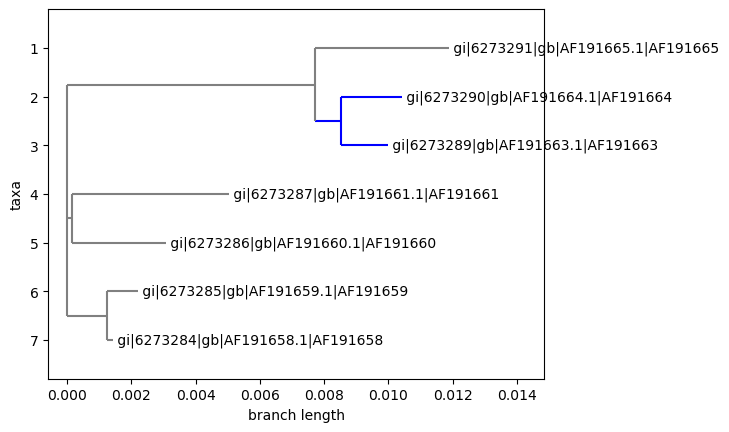

In [84]:
Phylo.draw(tree)